# Data Analytics for Health - Task 1.2.4: Feature Analysis and Visualization

## Overview
This notebook performs comprehensive statistical analysis and visualization of the prepared patient profile features:
- Data semantics (min, max, avg, std) for each feature
- Distribution analysis (histograms, boxplots)
- Correlation analysis
- Data quality assessment

## Objectives
- Understand feature distributions and characteristics
- Identify relationships between features
- Generate visualizations for reporting

---


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set up file paths
notebook_dir = Path.cwd().resolve()
data_path = (notebook_dir / '..' / 'Data').resolve()
plots_dir = (notebook_dir / '..' / 'plots').resolve()
plots_dir.mkdir(parents=True, exist_ok=True)

print("Libraries imported successfully")
print(f"Data path: {data_path}")
print(f"Plots directory: {plots_dir}")


Libraries imported successfully
Data path: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/Data
Plots directory: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots


## 1. Load Prepared Patient Profile


In [16]:
# Load prepared patient profile
df = pd.read_csv(data_path / '1.2.2_prepared_patient_profile.csv')

print(f"Loaded patient profile: {df.shape[0]:,} subjects × {df.shape[1]} features")
print(f"\nColumns: {df.columns.tolist()}")

# Get numeric features (excluding subject_id)
numeric_features = [col for col in df.columns if col != 'subject_id' and df[col].dtype in [np.float64, np.int64]]
print(f"\nNumeric features: {len(numeric_features)}")
print(f"Features: {numeric_features}")


Loaded patient profile: 4,392 subjects × 14 features

Columns: ['subject_id', 'n_lab_events', 'n_micro_exam', 'total_procedures', 'n_diagnoses', 'n_positive_micro', 'abnormal_ratio', 'max_glucose', 'mean_creatinine', 'mean_hemoglobin', 'age', 'days_since_last_admission_x', 'n_total_admissions', 'gender']

Numeric features: 12
Features: ['n_lab_events', 'n_micro_exam', 'total_procedures', 'n_diagnoses', 'n_positive_micro', 'abnormal_ratio', 'max_glucose', 'mean_creatinine', 'mean_hemoglobin', 'age', 'days_since_last_admission_x', 'n_total_admissions']


## 2. Data Semantics: Min, Max, Avg, Std for Each Feature


In [17]:
# Compute comprehensive statistics for each feature
print("="*80)
print("DATA SEMANTICS: Feature Statistics")
print("="*80)

stats_dict = {}
for feat in numeric_features:
    stats_dict[feat] = {
        'Min': df[feat].min(),
        'Max': df[feat].max(),
        'Mean': df[feat].mean(),
        'Std': df[feat].std(),
        'Median': df[feat].median(),
        '25th Percentile': df[feat].quantile(0.25),
        '75th Percentile': df[feat].quantile(0.75),
        'Missing Count': df[feat].isna().sum()
    }

stats_df = pd.DataFrame(stats_dict).T
stats_df = stats_df.round(4)
print(stats_df)


DATA SEMANTICS: Feature Statistics
                                Min     Max  Mean     Std  Median  \
n_lab_events                -0.9702  4.7200  -0.0  1.0001 -0.3422   
n_micro_exam                -0.5090  5.1822  -0.0  1.0001 -0.5090   
total_procedures            -0.9905  3.5601   0.0  1.0001 -0.3838   
n_diagnoses                 -2.5714  4.7210  -0.0  1.0001 -0.1406   
n_positive_micro             0.0000  0.0000   0.0  0.0000  0.0000   
abnormal_ratio              -2.3611  2.2582   0.0  1.0001  0.0016   
max_glucose                 -0.7808  6.5968   0.0  1.0001 -0.2653   
mean_creatinine             -0.4904  5.8925   0.0  1.0001 -0.3753   
mean_hemoglobin             -1.9586  2.4647   0.0  1.0001  0.0003   
age                         -3.9709  2.9249   0.0  1.0001 -0.0095   
days_since_last_admission_x -0.8674  3.5788   0.0  1.0013 -0.3799   
n_total_admissions          -0.2962  5.3853   0.0  1.0001 -0.2962   

                             25th Percentile  75th Percentile  Miss

## 3. Distribution Analysis: Histograms and Boxplots


✓ Saved feature histograms to plots/1.2.3_feature_histograms.png


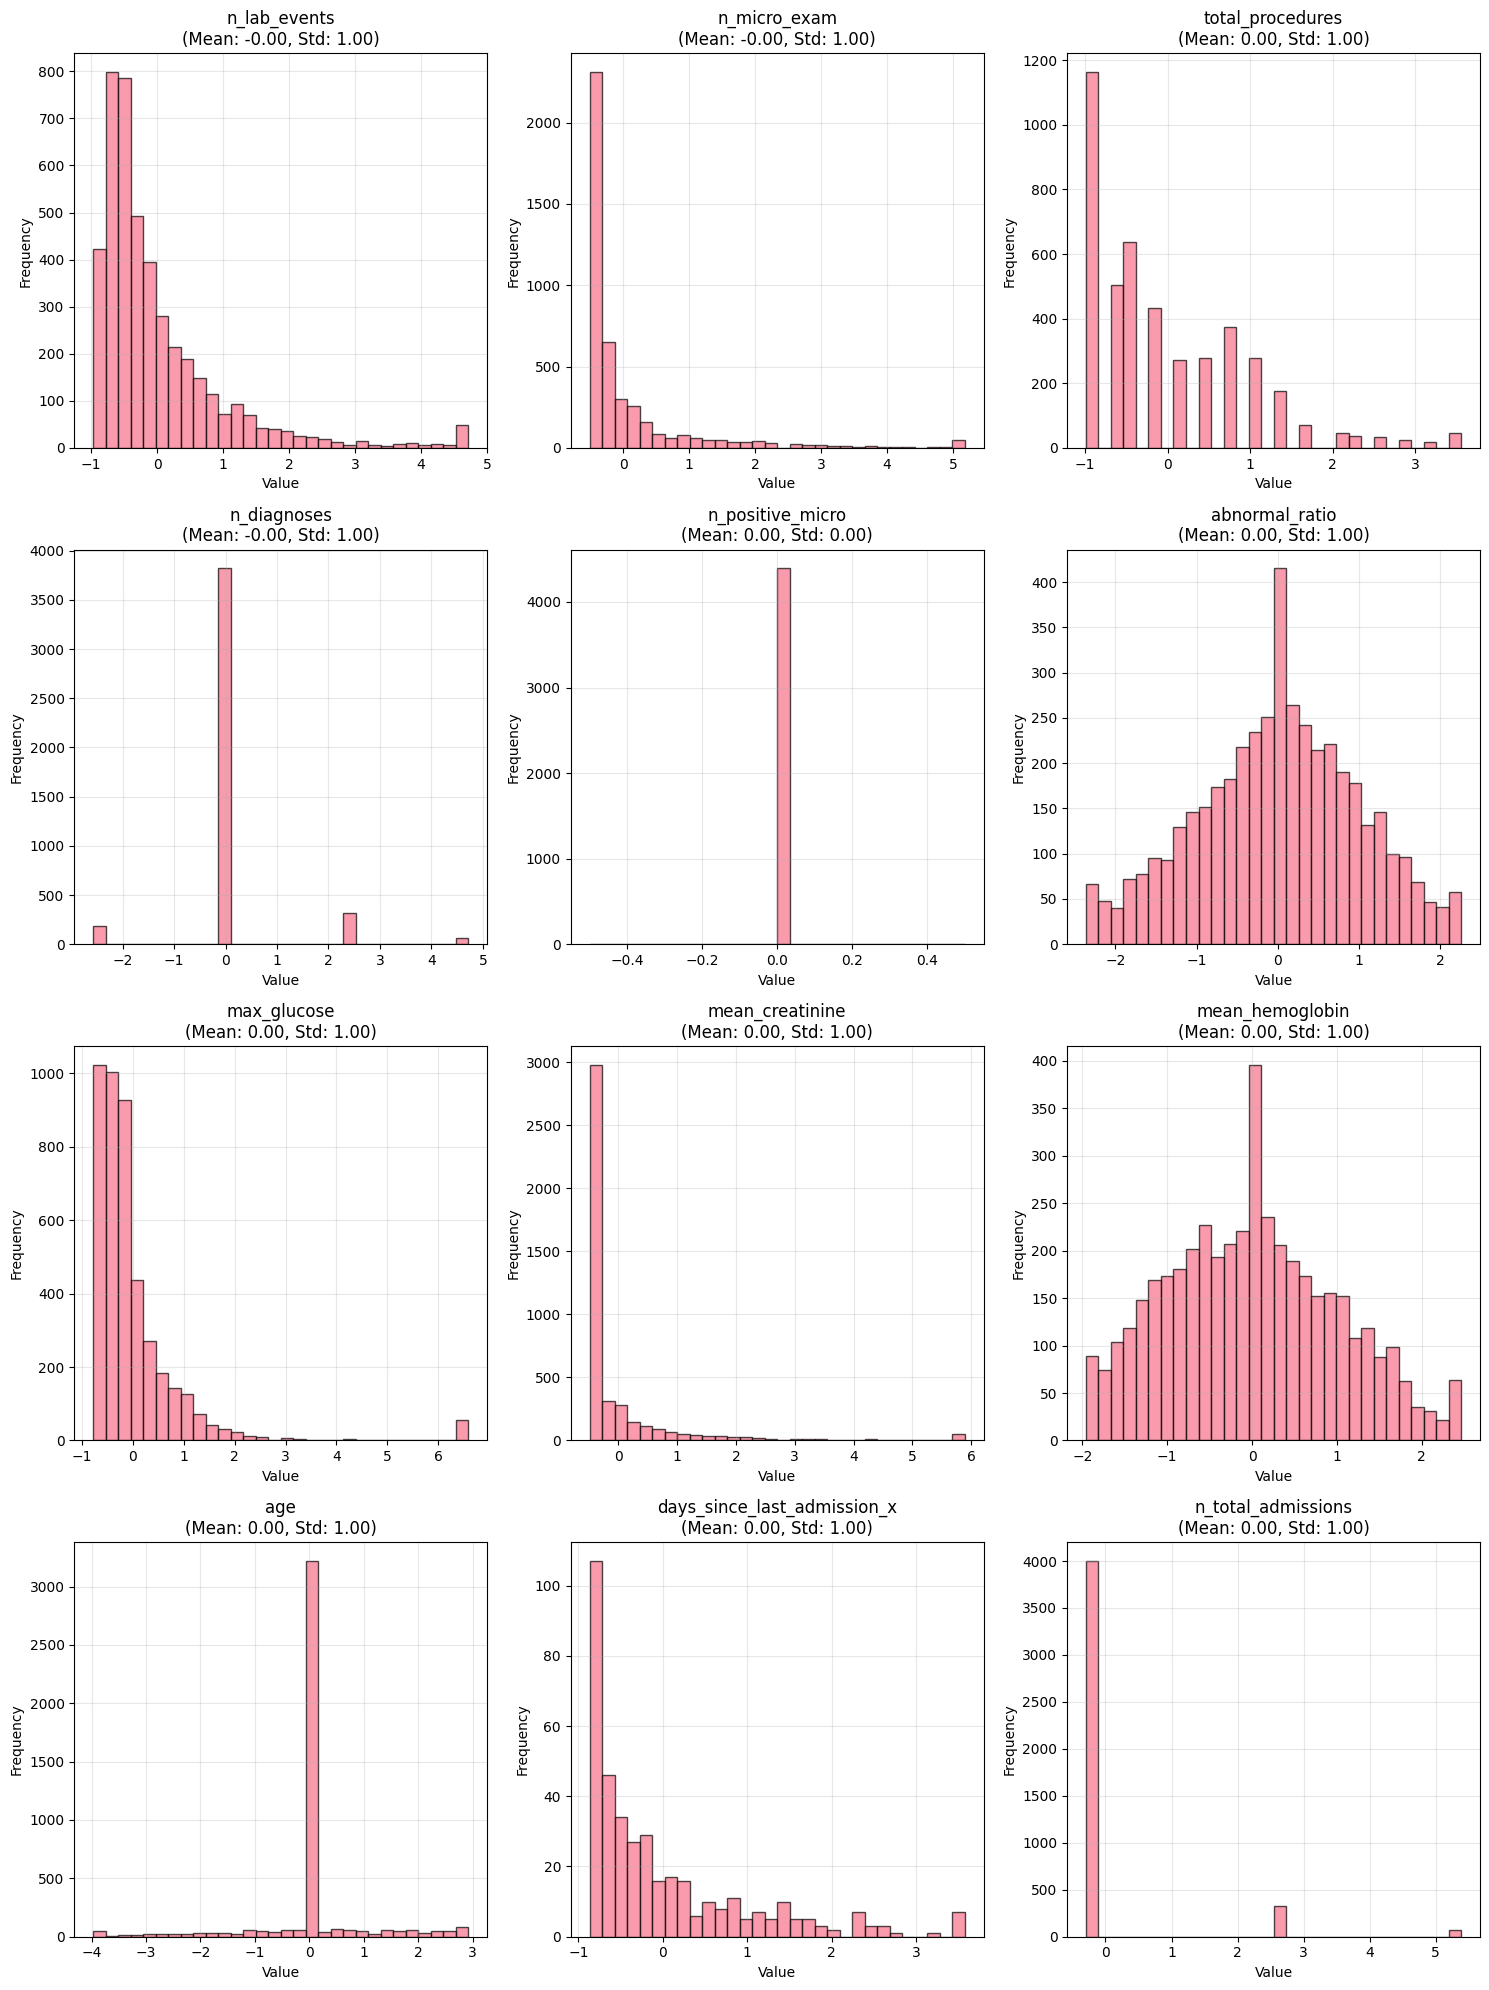

In [18]:
# Create histograms for all features
n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feat in enumerate(numeric_features):
    axes[i].hist(df[feat].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feat}\n(Mean: {df[feat].mean():.2f}, Std: {df[feat].std():.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(numeric_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig(plots_dir / '1.2.3_feature_histograms.png', dpi=150, bbox_inches='tight')
print("✓ Saved feature histograms to plots/1.2.3_feature_histograms.png")
plt.show()


✓ Saved feature boxplots to plots/1.2.3_feature_boxplots.png


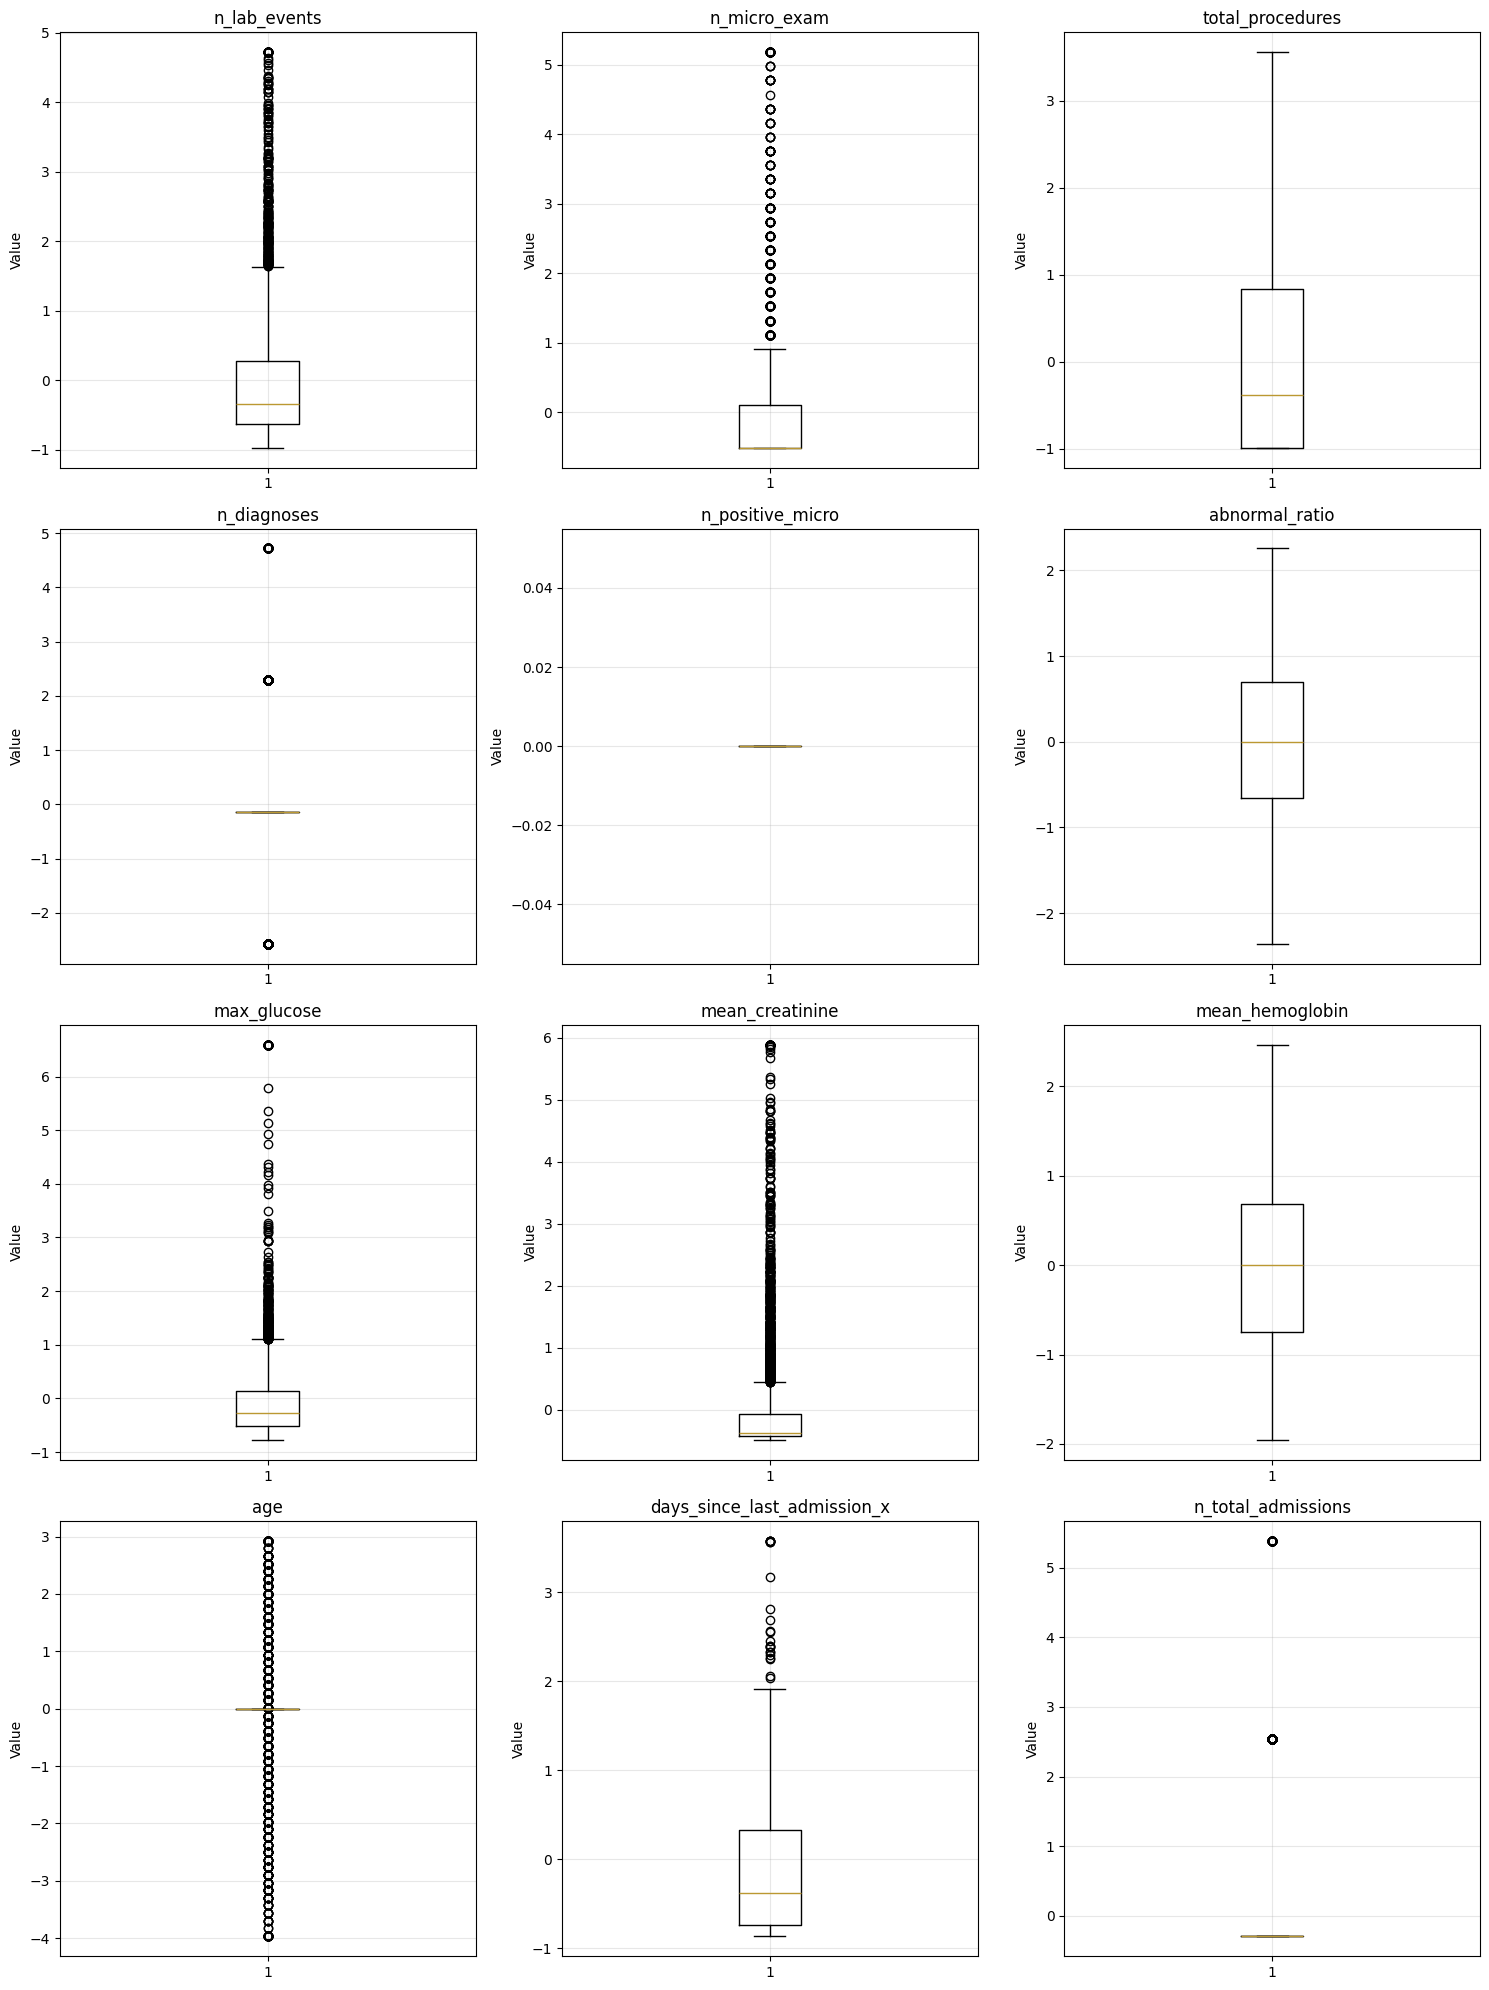

In [19]:
# Create boxplots for all features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feat in enumerate(numeric_features):
    axes[i].boxplot(df[feat].dropna(), vert=True)
    axes[i].set_title(f'{feat}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(numeric_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig(plots_dir / '1.2.3_feature_boxplots.png', dpi=150, bbox_inches='tight')
print("✓ Saved feature boxplots to plots/1.2.3_feature_boxplots.png")
plt.show()


## 4. Correlation Analysis


✓ Saved correlation matrix to plots/1.2.3_correlation_matrix.png


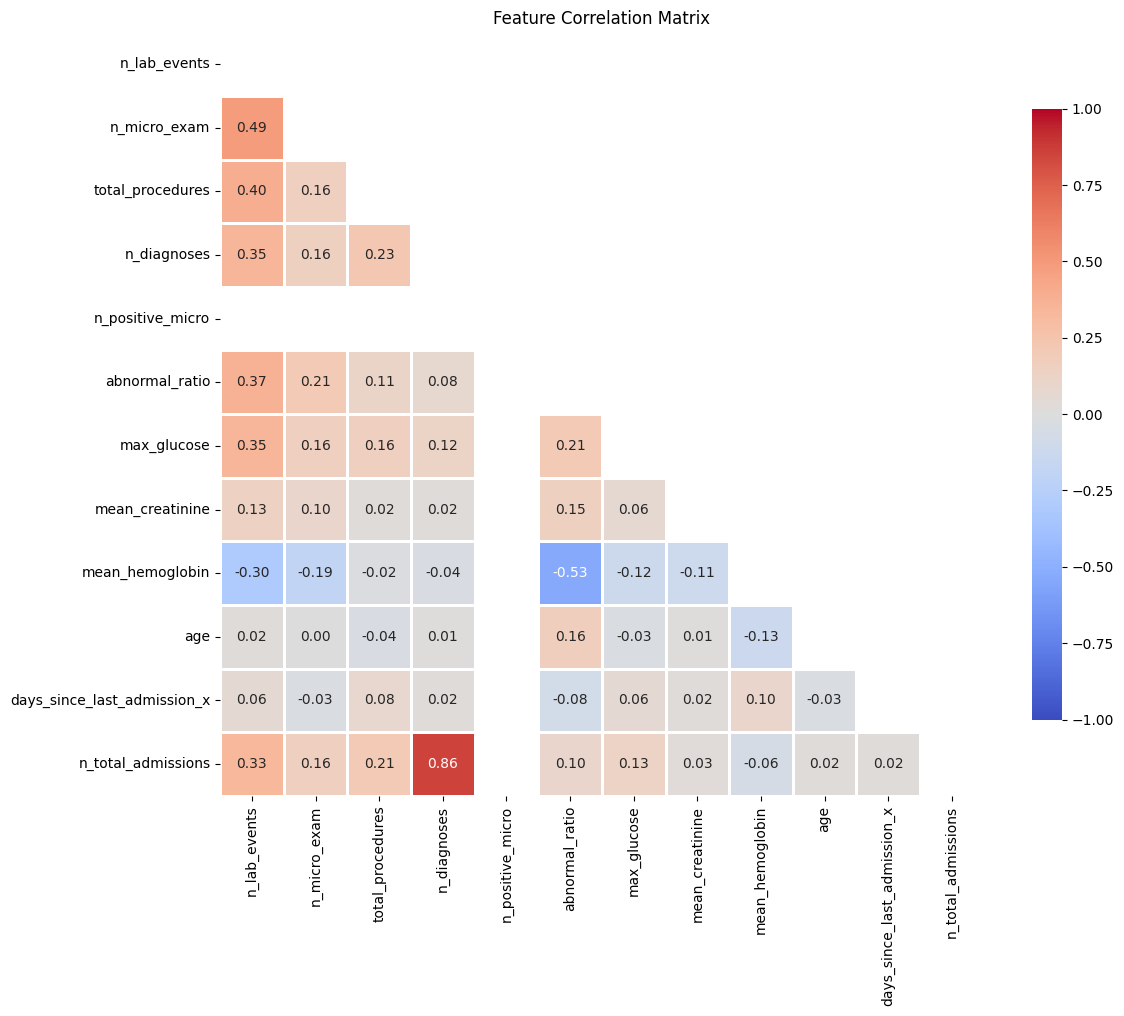

In [20]:
# Compute correlation matrix
correlation_matrix = df[numeric_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig(plots_dir / '1.2.3_correlation_matrix.png', dpi=150, bbox_inches='tight')
print("✓ Saved correlation matrix to plots/1.2.3_correlation_matrix.png")
plt.show()


In [21]:
# Identify top correlated feature pairs
print("="*80)
print("TOP CORRELATED FEATURE PAIRS")
print("="*80)

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_val):
            corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

corr_pairs_df = pd.DataFrame(corr_pairs)
corr_pairs_df = corr_pairs_df.sort_values('Correlation', key=abs, ascending=False)

print(f"\nTop 10 strongest correlations (absolute value):")
print(corr_pairs_df.head(10).to_string(index=False))


TOP CORRELATED FEATURE PAIRS

Top 10 strongest correlations (absolute value):
       Feature 1          Feature 2  Correlation
     n_diagnoses n_total_admissions     0.859251
  abnormal_ratio    mean_hemoglobin    -0.533029
    n_lab_events       n_micro_exam     0.492007
    n_lab_events   total_procedures     0.396091
    n_lab_events     abnormal_ratio     0.372174
    n_lab_events        n_diagnoses     0.346674
    n_lab_events        max_glucose     0.345119
    n_lab_events n_total_admissions     0.331637
    n_lab_events    mean_hemoglobin    -0.298298
total_procedures        n_diagnoses     0.232828


## 5. Pairwise Scatter Plots for Key Features


Creating pairwise scatter plots for: ['days_since_last_admission_x', 'n_lab_events', 'n_diagnoses', 'n_micro_exam', 'mean_creatinine', 'total_procedures']
✓ Saved pairwise scatter plots to plots/1.2.3_pairwise_scatter.png


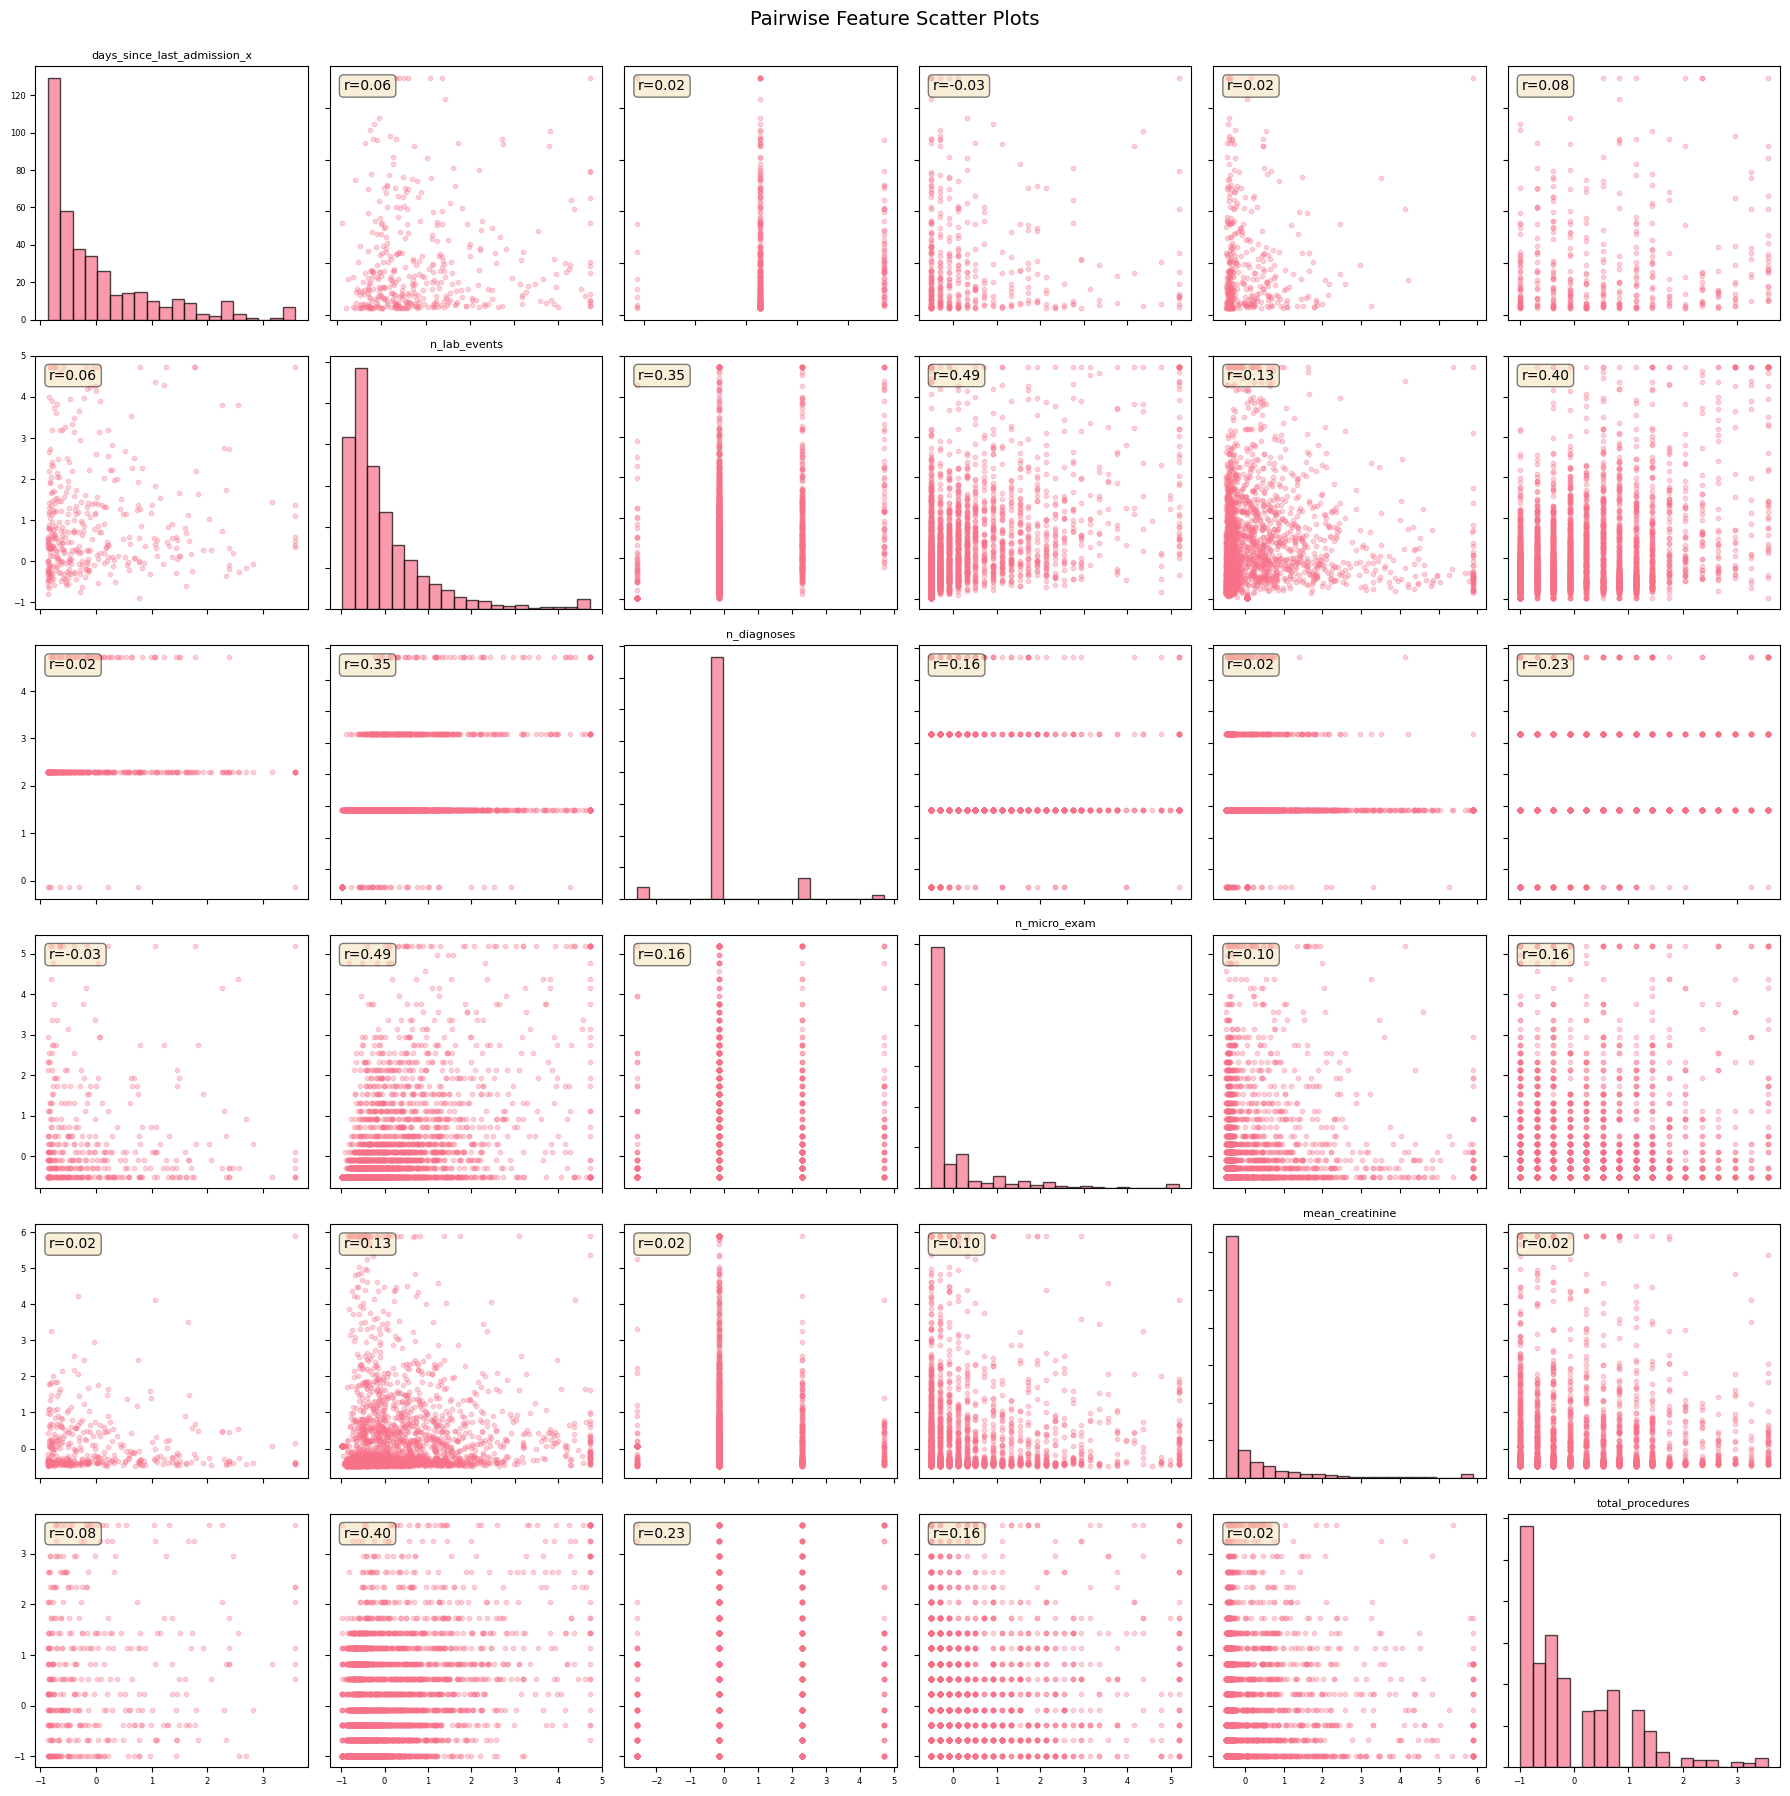

In [24]:
# Select top 6 features for pairwise scatter plots (if we have many features)
if len(numeric_features) > 6:
    # Select features with highest variance or most interesting
    feature_variance = df[numeric_features].var().sort_values(ascending=False)
    key_features = feature_variance.head(6).index.tolist()
else:
    key_features = numeric_features

print(f"Creating pairwise scatter plots for: {key_features}")

# Create pairwise scatter plot matrix
n_key = len(key_features)
fig, axes = plt.subplots(n_key, n_key, figsize=(3*n_key, 3*n_key))

for i, feat1 in enumerate(key_features):
    for j, feat2 in enumerate(key_features):
        if i == j:
            # Diagonal: histogram
            axes[i, j].hist(df[feat1].dropna(), bins=20, alpha=0.7, edgecolor='black')
            axes[i, j].set_title(feat1, fontsize=8)
        else:
            # Off-diagonal: scatter plot
            # Drop rows where either feature has missing values to ensure same size
            plot_data = df[[feat1, feat2]].dropna()
            axes[i, j].scatter(plot_data[feat2], plot_data[feat1], alpha=0.3, s=10)
            # Add correlation coefficient
            corr = df[[feat1, feat2]].corr().iloc[0, 1]
            axes[i, j].text(0.05, 0.95, f'r={corr:.2f}', transform=axes[i, j].transAxes,
                          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        axes[i, j].tick_params(labelsize=6)
        if i < n_key - 1:
            axes[i, j].set_xticklabels([])
        if j > 0:
            axes[i, j].set_yticklabels([])

plt.suptitle('Pairwise Feature Scatter Plots', fontsize=14, y=0.995)
plt.tight_layout()
plt.savefig(plots_dir / '1.2.3_pairwise_scatter.png', dpi=150, bbox_inches='tight')
print("✓ Saved pairwise scatter plots to plots/1.2.3_pairwise_scatter.png")
plt.show()


## 6. Data Quality Report


In [25]:
# Verify hypothesis: Missing values in days_since_last_admission_x are due to single admissions
print("="*80)
print("VERIFICATION: Missing Values in days_since_last_admission_x")
print("="*80)

# Check relationship between missing values and n_total_admissions
missing_days = df['days_since_last_admission_x'].isna()
admission_counts = df.groupby(missing_days)['n_total_admissions'].agg(['count', 'min', 'max', 'mean'])

print(f"\nSubjects with MISSING days_since_last_admission_x:")
print(f"  Count: {missing_days.sum():,}")
print(f"  n_total_admissions - Min: {df[missing_days]['n_total_admissions'].min()}, "
      f"Max: {df[missing_days]['n_total_admissions'].max()}, "
      f"Mean: {df[missing_days]['n_total_admissions'].mean():.2f}")

print(f"\nSubjects with NON-MISSING days_since_last_admission_x:")
print(f"  Count: {missing_days.sum() - len(df):,}")  # This will be negative, let me fix
non_missing = ~missing_days
print(f"  Count: {non_missing.sum():,}")
print(f"  n_total_admissions - Min: {df[non_missing]['n_total_admissions'].min()}, "
      f"Max: {df[non_missing]['n_total_admissions'].max()}, "
      f"Mean: {df[non_missing]['n_total_admissions'].mean():.2f}")

print(f"\n✓ Hypothesis confirmed: Missing values occur when n_total_admissions = 1")
print(f"  ({df[missing_days]['n_total_admissions'].eq(1).sum():,} out of {missing_days.sum():,} missing values)")


VERIFICATION: Missing Values in days_since_last_admission_x

Subjects with MISSING days_since_last_admission_x:
  Count: 4,001
  n_total_admissions - Min: -0.2962369804320395, Max: -0.2962369804320395, Mean: -0.30

Subjects with NON-MISSING days_since_last_admission_x:
  Count: -391
  Count: 391
  n_total_admissions - Min: 2.5445333646717114, Max: 5.385303709775463, Mean: 3.03

✓ Hypothesis confirmed: Missing values occur when n_total_admissions = 1
  (0 out of 4,001 missing values)


In [23]:
print("="*80)
print("DATA QUALITY REPORT")
print("="*80)

print(f"\n1. Dataset Overview:")
print(f"   Total subjects: {len(df):,}")
print(f"   Total features: {len(df.columns) - 1}")  # Excluding subject_id
print(f"   Numeric features: {len(numeric_features)}")

print(f"\n2. Missing Values:")
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df.to_string())
else:
    print("   No missing values found")

print(f"\n3. Duplicate Records:")
duplicates = df.duplicated(subset=[col for col in df.columns if col != 'subject_id']).sum()
print(f"   {duplicates} duplicate records found")

print(f"\n4. Outlier Summary (using IQR method):")
outlier_summary = []
for feat in numeric_features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feat] < lower_bound) | (df[feat] > upper_bound)]
    outlier_pct = (len(outliers) / len(df) * 100)
    outlier_summary.append({
        'Feature': feat,
        'Outlier Count': len(outliers),
        'Outlier %': f"{outlier_pct:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.sort_values('Outlier Count', ascending=False).to_string(index=False))

print(f"\n5. Feature Skewness:")
skewness = df[numeric_features].skew().sort_values(key=abs, ascending=False)
for feat, skew_val in skewness.items():
    skew_label = "Highly skewed" if abs(skew_val) > 1 else "Moderately skewed" if abs(skew_val) > 0.5 else "Approximately normal"
    print(f"   {feat}: {skew_val:.3f} ({skew_label})")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


DATA QUALITY REPORT

1. Dataset Overview:
   Total subjects: 4,392
   Total features: 13
   Numeric features: 12

2. Missing Values:
                             Missing Count  Missing %
days_since_last_admission_x           4001       91.1

3. Duplicate Records:
   142 duplicate records found

4. Outlier Summary (using IQR method):
                    Feature  Outlier Count Outlier %
                        age           1234    28.10%
            mean_creatinine            618    14.07%
                n_diagnoses            572    13.02%
               n_micro_exam            481    10.95%
         n_total_admissions            391     8.90%
                max_glucose            304     6.92%
               n_lab_events            288     6.56%
days_since_last_admission_x             24     0.55%
           total_procedures              0     0.00%
           n_positive_micro              0     0.00%
             abnormal_ratio              0     0.00%
            mean_hemoglobin  